# COMPUTER VISION PROJECT

# CNN ( Flower Identification )

### DOMAIN: Botanical research

### PROJECT OBJECTIVE:
Company’s management requires an automation which can create a classifier capable of determining a flower’s species from a photo.

###  CONTEXT: 
University X is currently undergoing some research involving understanding the characteristicsof
flowers. They already have invested on curating sample images. They require an automation which cancreate a classifier capable of determining a flower’s species from a photo. 

### DATASET DESCRIPTION:
The data set comprises of images from 5 species of flowers daisy, tulip, rose, sunflower, and dandelion. Dataset can be downloaded from here https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

Context:
- This dataset contains 4242 images of flowers.
- The data collection is based on the data flicr, google images, yandex images.
- This datastet is used to recognize plants from the photo.

Content:
- The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
- For each class there are about 800 photos. 
- Photos are not high resolution, about 320x240 pixels. 
- Photos are not reduced to a single size, they have different proportions!

### STEPS AND TASKS: 

### Step 1 : Loading and Understanding the data

In [81]:
# Import required libraries

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow
tensorflow.__version__

'2.12.0'

In [107]:
tensorflow.test.gpu_device_name()

'/device:GPU:0'

In [82]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
import os
import cv2

In [84]:
# os.chdir('/content/gdrive/MyDrive/flowers')

In [85]:
# Extracting the images and storing them in a dataframe

file_path = '/content/gdrive/MyDrive/flowers' 
df = pd.DataFrame(columns=['file_name','class','image'])


In [86]:
from PIL import Image

In [87]:
for i in os.listdir(file_path):
    if i != '.DS_Store':  #This if condition is machine specific - can be ignored 
        print(i)
        for j in os.listdir(os.path.join(file_path,i)):
            img = cv2.imread(os.path.join(file_path,i,j))
            rgb_img = img[:, :, ::-1]
            df = df.append({'file_name':j,'class':i,'image':rgb_img},ignore_index=True)

rose
sunflower
tulip
dandelion
daisy


In [91]:
df.shape

(4317, 3)

In [92]:
# Checking the dataframe
df.head()

,file_name,class,image
0,15996816031_7f2fea25cb_n.jpg,rose,"[[[25, 3, 5], [27, 2, 5], [32, 1, 6], [39, 0, ..."
1,17953368844_be3d18cf30_m.jpg,rose,"[[[164, 136, 86], [141, 115, 80], [123, 104, 7..."
2,15236835789_6009b8f33d.jpg,rose,"[[[20, 9, 7], [23, 9, 8], [24, 10, 9], [25, 9,..."
3,14597445311_8acb60247e.jpg,rose,"[[[112, 90, 53], [112, 90, 51], [110, 88, 49],..."
4,17090993740_fcc8b60b81.jpg,rose,"[[[36, 45, 24], [40, 48, 25], [50, 55, 32], [6..."


In [93]:
# Checking the total number of images extracted

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  4317 non-null   object
 1   class      4317 non-null   object
 2   image      4317 non-null   object
dtypes: object(3)
memory usage: 101.3+ KB


In [94]:
# Checking if there are any empty images read

df.isnull().sum()

file_name    0
class        0
image        0
dtype: int64

In [95]:
# Vizualizing the images

def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

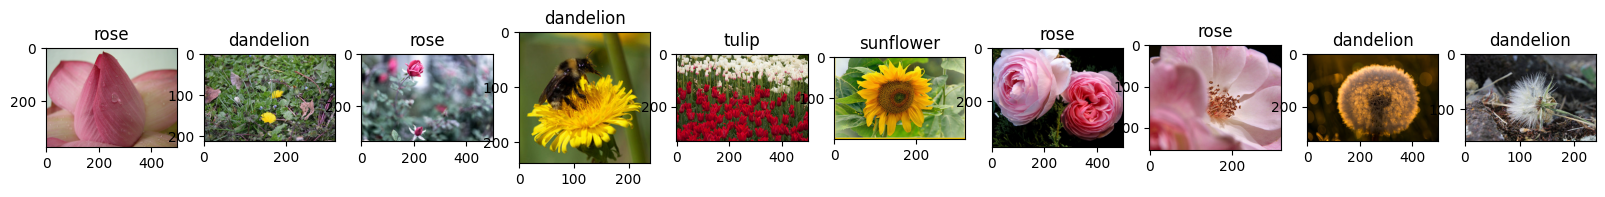

In [96]:
sample_img(df, 10)

In [97]:
# Creating X and y datasets

X_ = df['image']
y = df['class']

print(X_.shape)
print(y.shape)

(4317,)
(4317,)


In [98]:
# Reshaping X suitable for the model

import cv2
X = []

for i, j in enumerate(X_):
    img = cv2.resize(j, (128, 128))
    X.append(img)

In [99]:
type(X)

list

In [100]:
X = np.array(X)
print(type(X))
X.shape

<class 'numpy.ndarray'>


(4317, 128, 128, 3)

In [101]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4) # Will keep the test folder for final validation

# Split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=4)

print(type(X_train))
print(type(X_val))
print(type(X_test))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2719, 128, 128, 3)
(1166, 128, 128, 3)
(432, 128, 128, 3)


In [102]:
y_train
y_test
type(y_test)

pandas.core.series.Series

In [103]:
# Normalizing the X_train and X_val

X_train = (X_train/255).astype('float32')
X_val = (X_val/255).astype('float32')
X_test = (X_test/255).astype('float32')

In [104]:
# Trying to check the max and min values

print("Max and Min value in X_train:", X_train.max(), X_train.min())
print("Max and Min value in X_test:", X_val.max(), X_val.min())
print("Max and Min value in X_test:", X_test.max(), X_test.min())

Max and Min value in X_train: 1.0 0.0
Max and Min value in X_test: 1.0 0.0
Max and Min value in X_test: 1.0 0.0


In [105]:
# Convert your target feature to one-hot vectors

y_train_onehot = pd.get_dummies(y_train)
y_val_onehot = pd.get_dummies(y_val)
# y_test_onehot = pd.get_dummies(y_test)

print("Shape of y_train:", y_train_onehot.shape)
print("One value of y_train:", y_train_onehot)

Shape of y_train: (2719, 5)
One value of y_train:       daisy  dandelion  rose  sunflower  tulip
1245      0          0     0          1      0
832       0          0     0          1      0
1539      0          0     0          0      1
392       0          0     1          0      0
2708      0          1     0          0      0
...     ...        ...   ...        ...    ...
1288      0          0     0          1      0
2114      0          0     0          0      1
1727      0          0     0          0      1
3834      1          0     0          0      0
874       0          0     0          1      0

[2719 rows x 5 columns]


In [106]:
# Initializing basic CNN model

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


model = Sequential()

model.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation="softmax"))


# Compile the model
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], 
              optimizer="adam")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 conv2d_9 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_10 (Conv2D)          (None, 122, 122, 64)      73792     
                                                                 
 conv2d_11 (Conv2D)          (None, 120, 120, 32)      18464     
                                                                 
 flatten_2 (Flatten)         (None, 460800)            0         
                                                                 
 dense_16 (Dense)            (None, 64)                29491264  
                                                                 
 dense_17 (Dense)            (None, 128)              

In [108]:
# Datasets used will be:
# X_train, X_val, X_test
# y_train_onehot, y_val_onehot, y_test_onehot

tr_history = model.fit(x=X_train, 
                       y=y_train_onehot, 
                       batch_size=32, 
                       epochs=20, 
                       validation_data=(X_val, y_val_onehot))

Epoch 1/20
85/85 [==============================] - 17s 172ms/step - loss: 1.4136 - accuracy: 0.3810 - val_loss: 1.1900 - val_accuracy: 0.4605
Epoch 2/20
85/85 [==============================] - 15s 180ms/step - loss: 1.1652 - accuracy: 0.5193 - val_loss: 1.1951 - val_accuracy: 0.4923
Epoch 3/20
85/85 [==============================] - 15s 177ms/step - loss: 1.0840 - accuracy: 0.5649 - val_loss: 1.2266 - val_accuracy: 0.5403
Epoch 4/20
85/85 [==============================] - 14s 162ms/step - loss: 0.8498 - accuracy: 0.6837 - val_loss: 1.1526 - val_accuracy: 0.5695
Epoch 5/20
85/85 [==============================] - 15s 176ms/step - loss: 0.5550 - accuracy: 0.8029 - val_loss: 1.9487 - val_accuracy: 0.4854
Epoch 6/20
85/85 [==============================] - 14s 163ms/step - loss: 0.3396 - accuracy: 0.8919 - val_loss: 1.8502 - val_accuracy: 0.5403
Epoch 7/20
85/85 [==============================] - 14s 163ms/step - loss: 0.1638 - accuracy: 0.9485 - val_loss: 2.8745 - val_accuracy: 0.5137

In [109]:
model.evaluate(X_val, y_val_onehot)

37/37 [==============================] - 1s 40ms/step - loss: 4.6119 - accuracy: 0.5189


[4.61189079284668, 0.5188679099082947]

Text(0.5, 1.0, 'Training and validation loss')

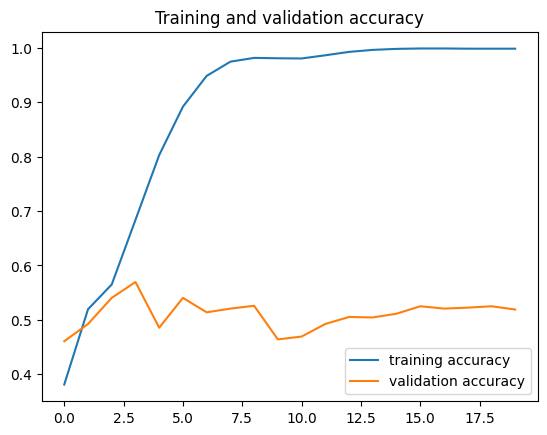

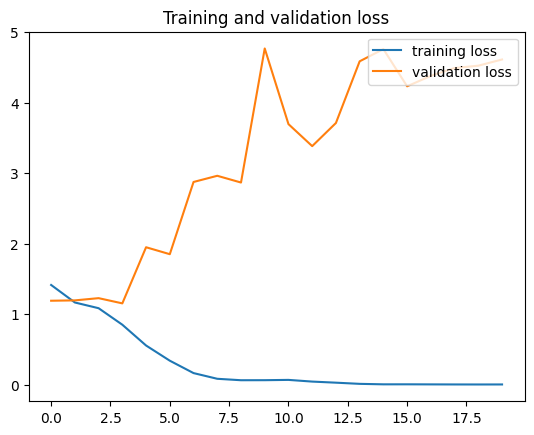

In [110]:
## Accuracy and Loss plots

accuracy      = tr_history.history['accuracy']
val_accuracy  = tr_history.history['val_accuracy']
loss     = tr_history.history['loss']
val_loss = tr_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [111]:
# Saving the model
model.save('cnn_transfer.h5')
model.save_weights('cnn_tr_weights.h5')

In [112]:
# Basic CNN + Pooling + Dropout

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model1.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model1.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model1.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model1.add(Dropout(rate=0.2))

model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(5, activation="softmax"))


# Compile the model
model1.compile(loss="categorical_crossentropy", 
               metrics=["accuracy"], 
               optimizer="adam")

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 128)     147584    
                                                                 
 conv2d_14 (Conv2D)          (None, 122, 122, 64)      73792     
                                                                 
 conv2d_15 (Conv2D)          (None, 120, 120, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 60, 60, 32)        0         
                                                      

In [113]:
# Fit the model

tr_history1 = model1.fit(x=X_train, 
                         y=y_train_onehot, 
                         batch_size=64, 
                         epochs=10, 
                         validation_data=(X_val, y_val_onehot))

Epoch 1/10
43/43 [==============================] - 21s 411ms/step - loss: 1.4974 - accuracy: 0.3273 - val_loss: 1.1728 - val_accuracy: 0.5129
Epoch 2/10
43/43 [==============================] - 17s 400ms/step - loss: 1.1289 - accuracy: 0.5495 - val_loss: 1.1159 - val_accuracy: 0.5472
Epoch 3/10
43/43 [==============================] - 17s 397ms/step - loss: 0.9982 - accuracy: 0.6142 - val_loss: 1.1038 - val_accuracy: 0.5197
Epoch 4/10
43/43 [==============================] - 17s 396ms/step - loss: 0.9525 - accuracy: 0.6322 - val_loss: 1.0793 - val_accuracy: 0.5789
Epoch 5/10
43/43 [==============================] - 17s 396ms/step - loss: 0.8521 - accuracy: 0.6653 - val_loss: 1.0261 - val_accuracy: 0.6012
Epoch 6/10
43/43 [==============================] - 17s 396ms/step - loss: 0.6457 - accuracy: 0.7529 - val_loss: 1.0929 - val_accuracy: 0.6158
Epoch 7/10
43/43 [==============================] - 17s 397ms/step - loss: 0.4415 - accuracy: 0.8415 - val_loss: 1.3151 - val_accuracy: 0.5969

In [114]:
# Loss and Accuracy

model1.evaluate(X_val, y_val_onehot)

37/37 [==============================] - 2s 41ms/step - loss: 2.4294 - accuracy: 0.5686


[2.4293761253356934, 0.5686106085777283]

Text(0.5, 1.0, 'Training and validation loss')

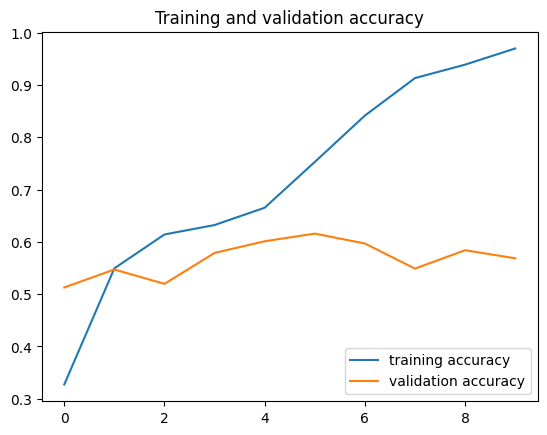

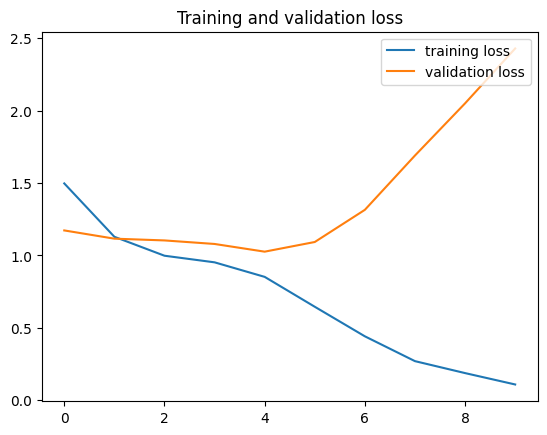

In [115]:
## Accuracy and Loss plots

accuracy = tr_history1.history['accuracy']
val_accuracy = tr_history1.history['val_accuracy']
loss = tr_history1.history['loss']
val_loss = tr_history1.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [116]:
# Saving model and its weights for future use

model1.save('cnn_normalized.h5')
model1.save_weights('cnn_weights1.h5')

# Transfer Learning

## VGG16

In [117]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg16 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [118]:
tr_history2 = model_vgg16.fit(x=X_train, 
                              y=y_train_onehot, 
                              batch_size=64, 
                              epochs=25, 
                              validation_data=(X_val, y_val_onehot))

Epoch 1/25
43/43 [==============================] - 8s 142ms/step - loss: 1.1283 - accuracy: 0.5480 - val_loss: 0.7526 - val_accuracy: 0.7307
Epoch 2/25
43/43 [==============================] - 6s 144ms/step - loss: 0.7154 - accuracy: 0.7319 - val_loss: 0.6627 - val_accuracy: 0.7479
Epoch 3/25
43/43 [==============================] - 6s 146ms/step - loss: 0.5964 - accuracy: 0.7749 - val_loss: 0.6091 - val_accuracy: 0.7753
Epoch 4/25
43/43 [==============================] - 5s 122ms/step - loss: 0.5346 - accuracy: 0.8003 - val_loss: 0.5848 - val_accuracy: 0.7830
Epoch 5/25
43/43 [==============================] - 6s 146ms/step - loss: 0.4696 - accuracy: 0.8271 - val_loss: 0.5675 - val_accuracy: 0.7890
Epoch 6/25
43/43 [==============================] - 5s 123ms/step - loss: 0.4089 - accuracy: 0.8437 - val_loss: 0.5792 - val_accuracy: 0.7907
Epoch 7/25
43/43 [==============================] - 5s 121ms/step - loss: 0.3626 - accuracy: 0.8665 - val_loss: 0.6136 - val_accuracy: 0.7744
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

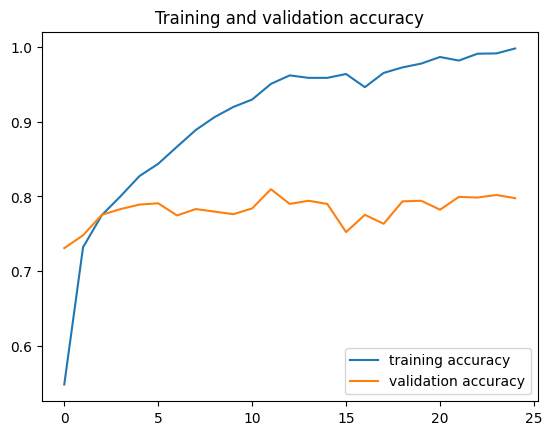

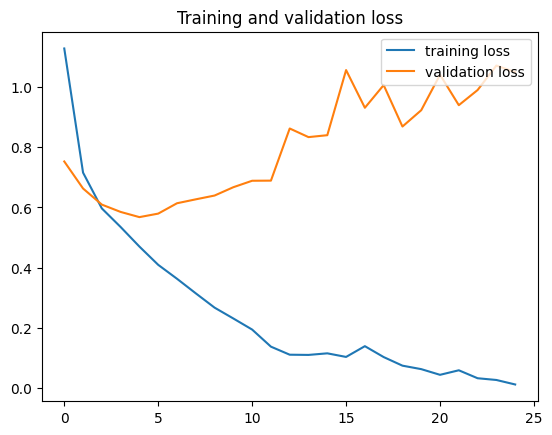

In [119]:
## Accuracy and Loss plots

accuracy = tr_history2.history['accuracy']
val_accuracy = tr_history2.history['val_accuracy']
loss = tr_history2.history['loss']
val_loss = tr_history2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [120]:
# Saving model weights

model_vgg16.save('vgg16.h5')
model_vgg16.save_weights('vgg16_weights.h5')

## VGG19

In [121]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [122]:
tr_history3 = model_vgg19.fit(x=X_train, 
                              y=y_train_onehot, 
                              batch_size=64, 
                              epochs=25, 
                              validation_data=(X_val, y_val_onehot))

Epoch 1/25
43/43 [==============================] - 11s 165ms/step - loss: 1.0126 - accuracy: 0.6028 - val_loss: 0.8068 - val_accuracy: 0.6998
Epoch 2/25
43/43 [==============================] - 6s 146ms/step - loss: 0.5967 - accuracy: 0.7863 - val_loss: 0.5814 - val_accuracy: 0.7830
Epoch 3/25
43/43 [==============================] - 6s 150ms/step - loss: 0.4094 - accuracy: 0.8514 - val_loss: 0.5283 - val_accuracy: 0.8122
Epoch 4/25
43/43 [==============================] - 6s 150ms/step - loss: 0.3003 - accuracy: 0.8875 - val_loss: 0.5822 - val_accuracy: 0.8062
Epoch 5/25
43/43 [==============================] - 7s 168ms/step - loss: 0.2643 - accuracy: 0.9058 - val_loss: 0.5932 - val_accuracy: 0.8113
Epoch 6/25
43/43 [==============================] - 6s 149ms/step - loss: 0.1745 - accuracy: 0.9430 - val_loss: 0.6522 - val_accuracy: 0.8002
Epoch 7/25
43/43 [==============================] - 7s 166ms/step - loss: 0.1404 - accuracy: 0.9496 - val_loss: 0.7665 - val_accuracy: 0.7813
Epoch

Text(0.5, 1.0, 'Training and validation loss')

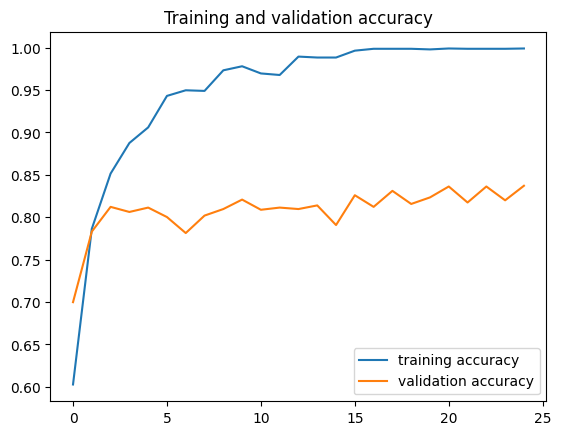

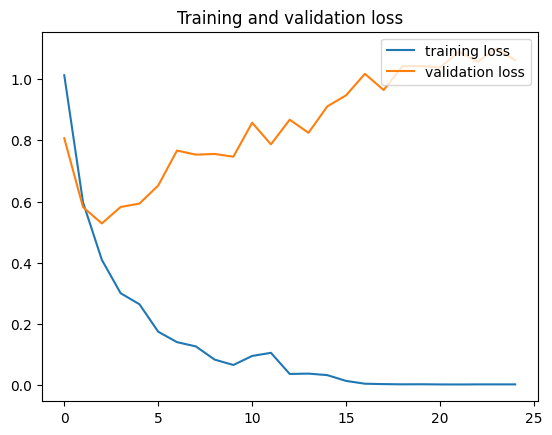

In [123]:
## Accuracy and Loss plots

accuracy = tr_history3.history['accuracy']
val_accuracy = tr_history3.history['val_accuracy']
loss = tr_history3.history['loss']
val_loss = tr_history3.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [124]:
# Saving model and its weights for future use

model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.h5')

## Resnet50

In [125]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=X_train[0].shape,
                      weights='imagenet',
                      include_top=False) #imports the ResNet50 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
#x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_resnet50 = Model(inputs=base_model.input,
                       outputs=preds)

# set the first 150 layers of the network to be non-trainable
for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True

# Compile the model
model_resnet50.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [126]:
tr_history4 = model_resnet50.fit(x=X_train, 
                                 y=y_train_onehot, 
                                 batch_size=8, 
                                 epochs=20, 
                                 validation_data=(X_val, y_val_onehot))

Epoch 1/20
340/340 [==============================] - 20s 35ms/step - loss: 1.3937 - accuracy: 0.4090 - val_loss: 1.3366 - val_accuracy: 0.4468
Epoch 2/20
340/340 [==============================] - 11s 31ms/step - loss: 1.1642 - accuracy: 0.5539 - val_loss: 1.1834 - val_accuracy: 0.5472
Epoch 3/20
340/340 [==============================] - 11s 31ms/step - loss: 1.0283 - accuracy: 0.6057 - val_loss: 1.2280 - val_accuracy: 0.5369
Epoch 4/20
340/340 [==============================] - 10s 31ms/step - loss: 0.9096 - accuracy: 0.6638 - val_loss: 1.1121 - val_accuracy: 0.5755
Epoch 5/20
340/340 [==============================] - 11s 32ms/step - loss: 0.8228 - accuracy: 0.7017 - val_loss: 1.1711 - val_accuracy: 0.5506
Epoch 6/20
340/340 [==============================] - 10s 31ms/step - loss: 0.7271 - accuracy: 0.7554 - val_loss: 1.1448 - val_accuracy: 0.5772
Epoch 7/20
340/340 [==============================] - 11s 32ms/step - loss: 0.6352 - accuracy: 0.7782 - val_loss: 1.1194 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

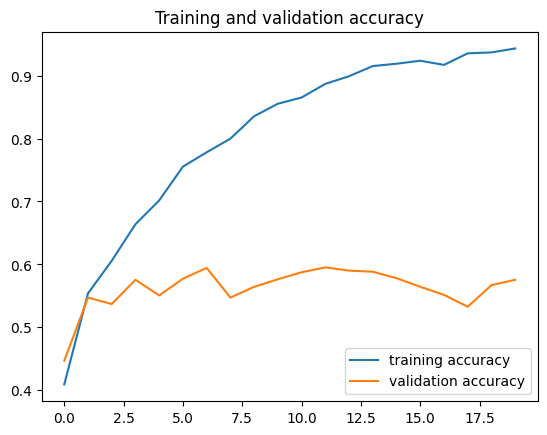

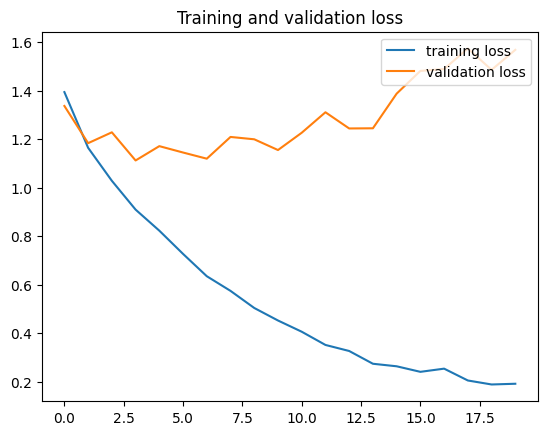

In [127]:
## Accuracy and Loss plots

accuracy = tr_history4.history['accuracy']
val_accuracy = tr_history4.history['val_accuracy']
loss = tr_history4.history['loss']
val_loss = tr_history4.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [128]:
# Saving model and its weights for future use

model_resnet50.save('resnet50.h5')
model_resnet50.save_weights('resnet50_weights.h5')

### Loading the saved models and doing the prediction

In [129]:
from tensorflow.keras.models import load_model

# Loading VGG16
model_vgg16 = load_model('vgg16.h5')

# Loading VGG19
model_vgg19 = load_model('vgg19.h5')

# Loading Resnet50
model_resnet50 = load_model('resnet50.h5')


In [130]:
y_test

3591        daisy
1039    sunflower
3158    dandelion
3326    dandelion
3006    dandelion
          ...    
1590        tulip
2690    dandelion
1837        tulip
2150        tulip
738          rose
Name: class, Length: 432, dtype: object

In [131]:
# Lets reindex our y_test labels

list1 = []
for x in y_test:
  list1.append(x)
# list1
y_test = pd.Series(data = list1)
y_test

0          daisy
1      sunflower
2      dandelion
3      dandelion
4      dandelion
         ...    
427        tulip
428    dandelion
429        tulip
430        tulip
431         rose
Length: 432, dtype: object

In [132]:
y_test.value_counts()  # Check the distribution of various classes in test data 

dandelion    101
daisy         90
rose          87
tulip         80
sunflower     74
dtype: int64

In [145]:
# To check the labels of a 10 images from 10 to 19 serial no, use following code:

# p=14
# for p in range(20, 30):
#   print(p, y_test[p])
#   plt.imshow(X_test[p])
#   plt.show()

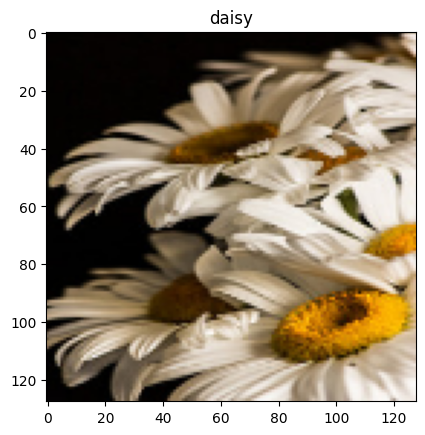

------------------------------------------------------------
VGG16
1/1 [==============================] - 0s 54ms/step
Softmax Outputs: [[9.9780983e-01 3.3321885e-06 3.6303243e-09 2.1866004e-03 1.8716845e-07]]
Predicted_Label_vgg16: daisy
------------------------------------------------------------
VGG19
1/1 [==============================] - 0s 35ms/step
Softmax Outputs: [[1.0000000e+00 3.9520101e-10 2.8319664e-12 1.6420526e-11 1.0721986e-12]]
Predicted_Label_vgg19: daisy
------------------------------------------------------------
ResNet50
1/1 [==============================] - 0s 55ms/step
Softmax Outputs: [[0.75528157 0.00655575 0.14829212 0.08106595 0.00880461]]
Predicted_Label_resnet50: daisy


In [144]:
# Predicting and vizualizing the test image using pretrained Models

import matplotlib.pyplot as plt
%matplotlib inline

n = 18

plt.title(y_test[n])
plt.imshow(X_test[n])
plt.show()


# VGG16
print('-'*60)
print('VGG16')
y_pred_vgg16 = model_vgg16.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg16)

# Convert the predicted probabilities to labels
for i in y_pred_vgg16:
    for j, k in enumerate(i):
        if k == y_pred_vgg16.max():
            print('Predicted_Label_vgg16:', y_test[j])


# VGG19
print('-'*60)
print('VGG19')
y_pred_vgg19 = model_vgg19.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg19)

# Convert the predicted probabilities to labels
for i in y_pred_vgg19:
    for j, k in enumerate(i):
        if k == y_pred_vgg19.max():
            print('Predicted_Label_vgg19:', y_test[j])

# ResNet50
print('-'*60)
print('ResNet50')
y_pred_rn = model_resnet50.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_rn)

# Convert the predicted probabilities to labels
for i in y_pred_rn:
    for j, k in enumerate(i):
        if k == y_pred_rn.max():
            print('Predicted_Label_resnet50:', y_test[j])


## Conclusion:
From the accuracies of trained models and the above test example we can say that,
- Vgg19 is the best performing model and ResNet is the worst performing in our use case.
- For future improvements we can change the architecture of added layers and tune various hyperparameters for a range of other values.
- Also we can considering balancing our dataset for the 5 categories to avoid bias towards high frequncy class.